## 필수 라이브러리 import

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 데이터 로드

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
!ls gdrive/MyDrive

 노래   3학년   colab  'Colab Notebooks'   dataset  'Untitled Diagram.drawio'


In [4]:
PATH = "gdrive/My Drive/dataset/sentence_relation"

In [5]:
train_data = pd.read_csv(os.path.join(PATH, 'train_data.csv'))
test_data = pd.read_csv(os.path.join(PATH, 'test_data.csv'))

In [6]:
train_data.head(5)

,index,premise,hypothesis,label
0,0,"씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서, 소년이나 장정들이...",씨름의 여자들의 놀이이다.,contradiction
1,1,"삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나,...",자작극을 벌인 이는 3명이다.,contradiction
2,2,이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다.,예측적 범죄예방 시스템 구축하고 고도화하는 것은 목적이 있기 때문이다.,entailment
3,3,광주광역시가 재개발 정비사업 원주민들에 대한 종합대책을 마련하는 등 원주민 보호에 ...,원주민들은 종합대책에 만족했다.,neutral
4,4,"진정 소비자와 직원들에게 사랑 받는 기업으로 오래 지속되고 싶으면, 이런 상황에서는...",이런 상황에서 책임 있는 모습을 보여주는 기업은 아주 드물다.,neutral


In [7]:
test_data.head(5)

,index,premise,hypothesis,label
0,0,다만 조금 좁아서 케리어를 펼치기 불편합니다.,케리어를 펼치기에 공간이 충분했습니다.,answer
1,1,그리고 위치가 시먼역보다는 샤오난먼역에 가까워요,시먼역보다는 샤오난먼역에 먼저 도착할 수 있어요,answer
2,2,구구절절 설명하고 이해시키려는 노력이 큰 의미없이 다가온다.,무엇인가 말을 많이 하기는 했지만 큰 의미가 있지는 않았다.,answer
3,3,몇 번을 다시봐도 볼 때마다 가슴이 저민다.,다시 봤을때는 무덤덤했다.,answer
4,4,"8월 중에 입주신청을 하면 청년은 9월, 신혼부부는 10월부터 입주가 가능하다.",8월 중에 입주신청을 하면 신혼부부는 9월 부터 입주가 가능하다.,answer


In [8]:
# pd.info()를 하면 정보를 한눈에 알 수 있어서 좋군
print(train_data.info(), end='\n\n')
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24998 entries, 0 to 24997
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       24998 non-null  int64 
 1   premise     24998 non-null  object
 2   hypothesis  24998 non-null  object
 3   label       24998 non-null  object
dtypes: int64(1), object(3)
memory usage: 781.3+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       1666 non-null   int64 
 1   premise     1666 non-null   object
 2   hypothesis  1666 non-null   object
 3   label       1666 non-null   object
dtypes: int64(1), object(3)
memory usage: 52.2+ KB
None


In [9]:
print('train data columns :', train_data.columns)
print('test data columns :', test_data.columns)

train data columns : Index(['index', 'premise', 'hypothesis', 'label'], dtype='object')
test data columns : Index(['index', 'premise', 'hypothesis', 'label'], dtype='object')


In [10]:
# 참/거짓/중립 분포가 비슷한 편이라는 것을 알 수 있군 (중요한 정보)
print('train labels count :', train_data['label'].value_counts(), sep='\n', end='\n\n')
print('test labels count :', test_data['label'].value_counts(), sep='\n')

train labels count :
entailment       8561
contradiction    8489
neutral          7948
Name: label, dtype: int64

test labels count :
answer    1666
Name: label, dtype: int64


In [11]:
# 결측값이 있는지 여부 체크 -> 결측값은 없군
print(train_data.isnull().sum(), end='\n\n')
print(test_data.isnull().sum())

index         0
premise       0
hypothesis    0
label         0
dtype: int64

index         0
premise       0
hypothesis    0
label         0
dtype: int64


## 데이터 분석(EDA)

Index(['entailment', 'contradiction', 'neutral'], dtype='object')
[8561 8489 7948]


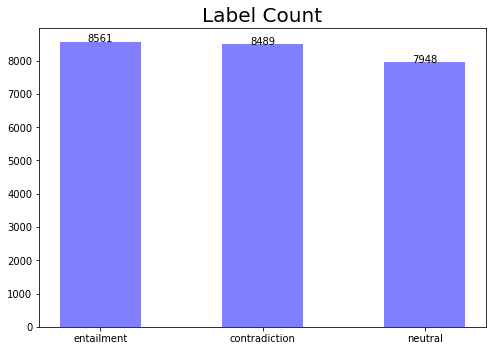

In [12]:
# label 분포를 bar 차트를 활용해 시각화
feature = train_data['label']

temp = feature.value_counts() # pandas series 형 리턴
print(temp.keys()) # 키
print(temp.values) # 값

def add_value_label(x_list, y_list):
    for i in range(len(x_list)):
        plt.annotate(y_list[i], (i,y_list[i]), ha='center')

plt.figure(figsize=(8, 5.5)) # 사이즈 지정
plt.title('Label Count', fontsize=20) # title 지정
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5) # x, y 값 
add_value_label(temp.keys(), temp.values)

plt.show()

### 전체, 가설 길이 확인

In [13]:
train_data['premise'].str.len() # 오. 이런식으로 문장마다 길이를 알 수 있구나

0        86
1        87
2        31
3        53
4        70
         ..
24993    83
24994    22
24995    48
24996    29
24997    42
Name: premise, Length: 24998, dtype: int64

In [14]:
max_len = np.max(train_data['premise'].str.len())
min_len = np.min(train_data['premise'].str.len())
mean_len = np.mean(train_data['premise'].str.len())

print(max_len, min_len, mean_len)

90 19 45.406552524201935


In [15]:
max_len = np.max(train_data['hypothesis'].str.len())
min_len = np.min(train_data['hypothesis'].str.len())
mean_len = np.mean(train_data['hypothesis'].str.len())

print(max_len, min_len, mean_len)

103 5 24.924433954716378


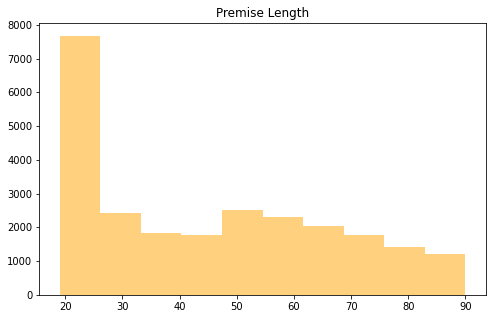

In [16]:
# 길이 분포를 hist 그래프로 확인하기 -> 20~25자 사이로 몰려있는 것을 볼 수 있다. 
plt.figure(figsize=(8, 5))
plt.title('Premise Length')

plt.hist(train_data['premise'].str.len(), alpha=0.5, color='orange')

plt.show()

## 간단한 전처리 

In [17]:
# 한글이 아닌 단어는 모두 제거
train_data['premise'] = train_data['premise'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
test_data['premise'] = test_data['premise'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')

train_data.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,index,premise,hypothesis,label
0,0,씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서 소년이나 장정들이 ...,씨름의 여자들의 놀이이다.,contradiction
1,1,삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나 ...,자작극을 벌인 이는 3명이다.,contradiction
2,2,이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다,예측적 범죄예방 시스템 구축하고 고도화하는 것은 목적이 있기 때문이다.,entailment
3,3,광주광역시가 재개발 정비사업 원주민들에 대한 종합대책을 마련하는 등 원주민 보호에 ...,원주민들은 종합대책에 만족했다.,neutral
4,4,진정 소비자와 직원들에게 사랑 받는 기업으로 오래 지속되고 싶으면 이런 상황에서는 ...,이런 상황에서 책임 있는 모습을 보여주는 기업은 아주 드물다.,neutral


In [18]:
train_data['hypothesis'] = train_data['hypothesis'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
test_data['hypothesis'] = test_data['hypothesis'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")
train_data.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,index,premise,hypothesis,label
0,0,씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서 소년이나 장정들이 ...,씨름의 여자들의 놀이이다,contradiction
1,1,삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나 ...,자작극을 벌인 이는 3명이다,contradiction
2,2,이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다,예측적 범죄예방 시스템 구축하고 고도화하는 것은 목적이 있기 때문이다,entailment
3,3,광주광역시가 재개발 정비사업 원주민들에 대한 종합대책을 마련하는 등 원주민 보호에 ...,원주민들은 종합대책에 만족했다,neutral
4,4,진정 소비자와 직원들에게 사랑 받는 기업으로 오래 지속되고 싶으면 이런 상황에서는 ...,이런 상황에서 책임 있는 모습을 보여주는 기업은 아주 드물다,neutral


## Modeling

### transformers 설치 및 라이브러리 불러오기

In [19]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 12.4 MB/s 
     |████████████████████████████████| 596 kB 65.1 MB/s 
     |████████████████████████████████| 77 kB 8.5 MB/s 
     |████████████████████████████████| 880 kB 72.7 MB/s 
     |████████████████████████████████| 6.6 MB 68.6 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=c8ddc7f25dce8d9c62672d9fc29ef798849cf825bcdd8699a5ad0984400b0968
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [20]:
import random
from tqdm import tqdm

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from transformers import TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification, AutoConfig, AutoTokenizer

### Seed 고정 및 GPU 설정

In [21]:
def seed_everything(seed:int = 1004):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

seed_everything(42)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


### Load Tokenizer, Model

In [22]:
MODEL_NAME = 'klue/roberta-large'

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

config = AutoConfig.from_pretrained(MODEL_NAME)
config.num_labels = 3

model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, config=config)

Downloading:   0%|          | 0.00/375 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/243k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/734k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/173 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/547 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25G [00:00<?, ?B/s]

Some weights of the model checkpoint at klue/roberta-large were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at klue/roberta-large and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'class

In [ ]:
print(model)

In [ ]:
print(config)

### Tokenizing

In [25]:
# Train Data를 Train과 Validation Dataset으로 나누고 각각 데이터를 Tokenizer를 통해 Tokenizing을 합니다.
train_dataset, val_dataset = train_test_split(train_data, test_size=0.2, shuffle=True, 
                                              stratify=train_data['label'])


In [26]:
print(train_dataset.shape, val_dataset.shape)

(19998, 4) (5000, 4)


In [27]:
# 예시
single_sentence = tokenizer('나는 여름이 좋다', padding=True, max_length=5, truncation=True)
print(single_sentence)
print(tokenizer.convert_ids_to_tokens(single_sentence['input_ids']))

{'input_ids': [0, 717, 2259, 4565, 2], 'token_type_ids': [0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1]}
['[CLS]', '나', '##는', '여름', '[SEP]']


In [28]:
tokenized_train = tokenizer(
    list(train_dataset['premise']),
    list(train_dataset['hypothesis']),
    padding = True,
    max_length = 256,
    truncation = True,
    return_tensors = 'pt' # torch.Tensor로 리턴되도록
)

tokenized_val = tokenizer(
    list(val_dataset['premise']),
    list(val_dataset['hypothesis']),
    padding = True,
    max_length = 256,
    truncation = True,
    return_tensors = 'pt' # torch.Tensor로 리턴되도록
)

In [29]:
print(tokenized_train['input_ids'][0])
print(tokenizer.decode(tokenized_train['input_ids'][0]))

tensor([    0, 30941,  2116, 11753,  5875, 12989,  2079, 14548,  2179,  3756,
         6941,  1510,  2103,  2291,  6911,  2522,  1432,  2348,  2284,  2052,
         7245,  3803,     2, 12989,  2145,  1510,  2103,  2291,  2073,  4273,
         2470,  1536,  2052,  1415,  2062,     2,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1])
[CLS] 이정재가 삼성그룹 부회장 이재용의 전처인 대상그룹 임세령 상무와 열애중이라고 합니다 [SEP] 이재용과 임세령은 결혼한 적이 없다 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD

In [30]:
class BERTDataset(torch.utils.data.Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x_tensor = x_tensor
        self.y_tensor = y_tensor

    def __getitem__(self, idx):
        #clone().detach() : PyTorch에서 tensor를 복사하는 방법
        item = {key: val[idx].clone().detach() for key, val in self.x_tensor.items()}
        item['label'] = torch.tensor(self.y_tensor[idx])

        return item
    
    def __len__(self):
        return len(self.y_tensor)

In [31]:
def label_to_num(label):
    label_dict = {"entailment": 0, "contradiction": 1, "neutral": 2, "answer": 3}
    num_label = []

    for v in label:
        num_label.append(label_dict[v])
    
    return num_label

train_label = label_to_num(train_dataset['label'].values)
val_label = label_to_num(val_dataset['label'].values)

In [32]:
train_dataset = BERTDataset(tokenized_train, train_label)
val_dataset = BERTDataset(tokenized_val, val_label)

In [33]:
print(train_dataset.__len__())
print(train_dataset.__getitem__(19997))
print(tokenizer.decode(train_dataset.__getitem__(19997)['input_ids']))

19998
{'input_ids': tensor([    0, 22748,  2255, 19418, 12830,  2256,  2079, 16878,  6385,  7873,
         2170,  3708,  4713,  2999,  7285,  7389,  2371,  2062,     2, 22748,
         2255, 19418, 12830,  2256,  2259, 17291,  2318,  7873,  2371,  2062,
            2,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
def compute_metrics(pred):
  """ validation을 위한 metrics function """
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  probs = pred.predictions

  # calculate accuracy using sklearn's function
  acc = accuracy_score(labels, preds) # 리더보드 평가에는 포함되지 않습니다.

  return {
      'accuracy': acc,
  }

In [37]:
training_args = TrainingArguments(
    output_dir='./result',
    num_train_epochs=3,
    per_device_train_batch_size=32,
    load_best_model_at_end = True,
    evaluation_strategy='steps',
    eval_steps = 500,
    save_total_limit=5,
    save_steps=500,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [38]:
trainer.train()
model.save_pretrained('./result/best_model')

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 19998
  Num Epochs = 3
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 1875


Step,Training Loss,Validation Loss,Accuracy
500,0.281500,0.427308,0.875800
1000,0.213800,0.441460,0.875600
1500,0.121300,0.530257,0.897000


***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8
Saving model checkpoint to ./result/checkpoint-500
Configuration saved in ./result/checkpoint-500/config.json
Model weights saved in ./result/checkpoint-500/pytorch_model.bin
tokenizer config file saved in ./result/checkpoint-500/tokenizer_config.json
Special tokens file saved in ./result/checkpoint-500/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8
Saving model checkpoint to ./result/checkpoint-1000
Configuration saved in ./result/checkpoint-1000/config.json
Model weights saved in ./result/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in ./result/checkpoint-1000/tokenizer_config.json
Special tokens file saved in ./result/checkpoint-1000/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8
Saving model checkpoint to ./result/checkpoint-1500
Configuration saved in ./result/checkpoint-1500/config.json
Model weights s

## 모델 불러오기 및 테스트 

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

Tokenizer_NAME = "klue/roberta-large"
tokenizer = AutoTokenizer.from_pretrained(Tokenizer_NAME)

MODEL_NAME = './result/checkpoint-1500'
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)
model.resize_token_embeddings(tokenizer.vocab_size)
model.to(device)

In [40]:
test_label = label_to_num(test_data['label'].values)

tokenized_test = tokenizer(
    list(test_data['premise']),
    list(test_data['hypothesis']),
    return_tensors="pt",
    max_length=128,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

test_dataset = BERTDataset(tokenized_test, test_label)

print(test_dataset.__len__())
print(test_dataset.__getitem__(1665))
print(tokenizer.decode(test_dataset.__getitem__(6)['input_ids']))

1666
{'input_ids': tensor([    0,   720,  3994,  2052, 10428,  2775,   647,  3657,  2119,  1085,
            3,     2,   720,  3994,  2052,   911,  2075,  3669,  2119,  3926,
         2088,  1513,  2359, 13964,     2,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)
model.eval()

In [44]:
output_pred = [] # 예측값
output_prob = [] # 확률값

for i, data in enumerate(tqdm(dataloader)):
    with torch.no_grad():
        outputs = model(
            input_ids=data['input_ids'].to(device),
            attention_mask=data['attention_mask'].to(device),
            token_type_ids=data['token_type_ids'].to(device)
        )
    
    logits = outputs[0]
    prob = F.softmax(logits, dim=-1).detach().cpu().numpy()
    logits = logits.detach().cpu().numpy()
    result = np.argmax(logits, axis=-1)

    output_pred.append(result)
    output_prob.append(prob)

100%|██████████| 105/105 [00:13<00:00,  7.71it/s]


In [47]:
pred_answer, output_prob = np.concatenate(output_pred).tolist(), np.concatenate(output_prob, axis=0).tolist()

In [50]:
def num_to_label(label):
    label_dict = {0: "entailment", 1: "contradiction", 2: "neutral"}
    str_label = []

    for i, v in enumerate(label):
        str_label.append([i,label_dict[v]])
    
    return str_label

answer = num_to_label(pred_answer)
print(answer)

[[0, 'contradiction'], [1, 'entailment'], [2, 'entailment'], [3, 'contradiction'], [4, 'contradiction'], [5, 'neutral'], [6, 'contradiction'], [7, 'entailment'], [8, 'entailment'], [9, 'neutral'], [10, 'contradiction'], [11, 'entailment'], [12, 'contradiction'], [13, 'entailment'], [14, 'neutral'], [15, 'neutral'], [16, 'contradiction'], [17, 'neutral'], [18, 'contradiction'], [19, 'neutral'], [20, 'contradiction'], [21, 'neutral'], [22, 'contradiction'], [23, 'entailment'], [24, 'contradiction'], [25, 'neutral'], [26, 'entailment'], [27, 'entailment'], [28, 'entailment'], [29, 'neutral'], [30, 'contradiction'], [31, 'contradiction'], [32, 'contradiction'], [33, 'neutral'], [34, 'neutral'], [35, 'contradiction'], [36, 'neutral'], [37, 'contradiction'], [38, 'entailment'], [39, 'contradiction'], [40, 'neutral'], [41, 'contradiction'], [42, 'contradiction'], [43, 'neutral'], [44, 'neutral'], [45, 'contradiction'], [46, 'neutral'], [47, 'entailment'], [48, 'contradiction'], [49, 'entailme

In [51]:
df = pd.DataFrame(answer, columns=['index', 'label'])

df.to_csv('./result/submission.csv', index=False)
print(df)

      index          label
0         0  contradiction
1         1     entailment
2         2     entailment
3         3  contradiction
4         4  contradiction
...     ...            ...
1661   1661        neutral
1662   1662  contradiction
1663   1663        neutral
1664   1664        neutral
1665   1665        neutral

[1666 rows x 2 columns]
